*2024.08.28*

I rand into a problem: For all the problems we face here, we can for sure identify which type of question it is though checking the answer. However, for the rest of the kinds: Charade, Double Definition, Containers, Deletion, Homophones, Cryptic definiton, Spoonerism: there are no clear way to check. I guess we can check though LLMs, but that would cost millions. So maybe we need a framework now, that can identify which question is which type first, and then solve the problem in that type. But for sure we cannot do it though preprocessing now. We can only know if our partition is correct thorugh checking the answers we have...

In [1]:
!pip install datasets
!pip install upsetplot
from datasets import load_dataset, load_from_disk, Dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
  Installing build dependencies ... done
  Getting requirements t

In [2]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')
from collections import Counter
import re
import os
import random

# Change it to your google drive path where this notebook located.
drive_path = '/content/drive/MyDrive/Projects/CryptoniteAnalysis/'

# Tehila's Drive
# drive_path = '/content/drive/MyDrive/huji/NLP/Projects/__Shared/CryptoniteAnalysis/'

os.chdir(drive_path)

Mounted at /content/drive


In [3]:
def load_dataset_from_disk():
    data_dir = 'datasets/cryptonite-official-split/'
    train_fp = data_dir + 'cryptonite-train.jsonl'
    val_fp = data_dir + 'cryptonite-val.jsonl'
    test_fp = data_dir + 'cryptonite-test.jsonl'
    datasets = load_dataset('json', data_files={'train': train_fp, 'validation': val_fp, 'test': test_fp})
    return datasets

def save_dataset_to_disk(datasets, save_dir, format='datasets'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    if format == 'jsonl':
        data['train'].to_json(save_dir + 'dataset_train.jsonl', lines=True)
        data['validation'].to_json(save_dir + 'dataset_val.jsonl', lines=True)
        data['test'].to_json(save_dir + 'dataset_test.jsonl', lines=True)
    elif format == 'datasets':
        data.save_to_disk(save_dir)




# Charade

In [4]:
chradeProblems = [
    {
        'clue': '"Noodles," mafia man, is coming after you (4)',
        'answer': 'UDON',
        'enumeration': "(4)"
    },
    {
        'clue': "Small crew’s power source (5)",
        'answer': 'STEAM',
        'enumeration': "(5)"
    },
    {
        'clue': "Wet season soon after Monday (7)",
        'answer': 'MONSOON',
        'enumeration': "(7)"
    },
    {
        'clue': "Subsequently cover 'Like a Rock' (5)",
        'answer': 'SOLID',
        'enumeration': "(5)"
    },
    {
        'clue': "Encrypts 100 praiseful poems (5)",
        'answer': 'CODES',
        'enumeration': "(5)"
    },
    {
        'clue': "Nourish Denmark’s capital after charge (4)",
        'answer': 'FEED',
        'enumeration': "(4)"
    },
    {
        'clue': "Friend, following father, related to a Catholic official (5)",
        'answer': 'PAPAL',
        'enumeration': "(5)"
    },
    {
        'clue': "Dorothy and Edward spoiled grandchildren (5)",
        'answer': 'DOTED',
        'enumeration': "(5)"
    },
    {
        'clue': "Police officer and editor got along (5)",
        'answer': 'COPED',
        'enumeration': "(5)"
    },
    {
        'clue': "Delaware marijuana warehouse (5)",
        'answer': 'DEPOT',
        'enumeration': "(5)"
    },
    {
        'clue': "Member acquires friend, not improperly (7)",
        'answer': 'LEGALLY',
        'enumeration': "(7)"
    },
    {
        'clue': "Prior belted one that is ultimately right (7)",
        'answer': 'EARLIER',
        'enumeration': "(7)"
    },
    {
        'clue': "Head of attorney liberal for one making an excuse (5)",
        'answer': 'ALIBI',
        'enumeration': "(5)"
    },
    {
        'clue': "Quiet bird has a sign on a strange occurrence (10)",
        'answer': 'PHENOMENON',
        'enumeration': "(10)"
    },
    {
        'clue': "Climb a trail followed by a dog (6)",
        'answer': 'ASCENT',
        'enumeration': "(6)"
    },
    {
        'clue': "Notice small vessel (4)",
        'answer': 'SPOT',
        'enumeration': "(4)"
    },
    {
        'clue': "Confusing situation with Mike’s conferencing app (4)",
        'answer': 'ZOOM',
        'enumeration': "(4)"
    },
    {
        'clue': "Tattle on dorm supervisor and racing tipster (3,3)",
        'answer': 'RAT OUT',
        'enumeration': "(3,3)"
    },
    {
        'clue': "Everyone was in debt - that's permitted (7)",
        'answer': 'ALLOWED',
        'enumeration': "(7)"
    },
    {
        'clue': "Vehicle seen by people in opera (6)",
        'answer': 'CARMEN',
        'enumeration': "(6)"
    },
    {
        'clue': "Book matches are new things (9)",
        'answer': 'NOVELTIES',
        'enumeration': "(9)"
    },
    {
        'clue': "Weapon used by many a Round Table knight (8)",
        'answer': 'LANCELOT',
        'enumeration': "(8)"
    },
    {
        'clue': "A country girl reading (7)",
        'answer': 'PERUSAL',
        'enumeration': "(7)"
    },
    {
        'clue': "Obvious disagreement for one in court (9)",
        'enumeration': '(9)',
        'answer': "PLAINTIFF"
    },
    {
        'clue': "Heather’s on fire, which is a shock (9)",
        'answer': 'STARTLING',
        'enumeration': "(9)"
    },
    {
        'clue': "My face is warm (7)",
        'answer': 'CORDIAL',
        'enumeration': "(7)"
    },
    {
        'clue': "Warm, cold or laid-back (7)",
        'answer': '',
        'enumeration': "(7)"
    },
    {
        'clue': "OK, that’s outstanding after all (7)",
        'enumeration': '(7)',
        'answer': "ALLOWED"
    },
    {
        'clue': "Petite soprano gets a lamp (6)",
        'answer': 'LIGHT',
        'enumeration': "(6)"
    },
    {
        'clue': "Little river's carbon stink (5)",
        'answer': 'CREEK',
        'enumeration': "(5)"
    },
    {
        'clue': "Daughter gets liquor tap (4)",
        'answer': 'DRUM',
        'enumeration': "(4)"
    },
    {
        'clue': "Mass is point one after seven (6)",
        'answer': 'WEIGHT',
        'enumeration': "(6)"
    },
    {
        'clue': "Composer's cut off at home (6)",
        'answer': 'CHOPIN',
        'enumeration': "(6)"
    },
    {
        'clue': "Strong dislike to a variation (8)",
        'answer': 'AVERSION',
        'enumeration': "(8)"
    },
    {
        'clue': "South-easten remedy is stable (6)",
        'answer': 'SECURE',
        'enumeration': "(6)"
    },
]


# Double Definition

In [5]:
# Here are 10 questions, 9 is correct (with high probability)
doubleDefinitionQuestions = [
    # The first two we got from wiki
    {"clue": "Not seeing window covering (5)",
    "enumeration": "(5)",
    "answer": "blind"},
    {"clue": "Eastern European buff (6)",
    "enumeration": "(6)",
    "answer": "POLISH"},
    # This one have multiple definitions
    {"clue": "Blue swallow feathers fell from above (4)",
    "enumeration": "(4)",
    "answer": "DOWN"},
    # Some from internet 1
    {"clue": "Robust author (5)",
    "enumeration": "(5)",
    "answer": "HARDY"},
    {"clue": "Bike was blue (5)",
    "enumeration": "(5)",
    "answer": "MOPED"},
    # Some from internet 2
    {"clue": "Business worry (6)",
    "enumeration": "(6)",
    "answer": "CONCERN"},
    {"clue": "Succession of command (5)",
    "enumeration": "(5)",
    "answer": "ORDER"},
    # Some from internet 3
    {"clue": "Dealer in stolen property — might be radio equipment (8)",
    "enumeration": "(8)",
    "answer": "RECEIVER"},
    {"clue": "Something on the inside gets one going to sea (5)",
    "enumeration": "(5)",
    "answer": "LINER"},# I feel this is also strechy... Why is liner 'something on the inside'?
    {"clue": "Exploits that require to be witnessed (5)",
    "enumeration": "(5)",
    "answer": "DEEDS"},
    # internet 4 New ones.....
    {"clue": "Fruit goes out of fashion (5)",
    "enumeration": "(5)",
    "answer": "dates"},# A bit strechy anyways
    {"clue": "Me or Adam? (5,6)",
    "enumeration": "(5,6)",
    "answer": "first person"},
    {"clue": "Spy found (5)",
    "enumeration": "(5)",
    "answer": "plant"},# hard to solve without crossing - according to the author
    ]

# Anagram
First I will filter out all anagrams (takes about 2 mins)

In [6]:
def identify_is_anagram(sample):
    clue = sample['clue']
    # Remove the tuple at the end (assuming there are no other parenthsis in the clue.)
    clue = clue.rsplit('(', 1)[0]
    # Remove periods and commas
    clue = clue.replace('.', '').replace(',', '')
    # Split the sentence into a list of words
    word_list = clue.split()
    # get the word length for each word in clue
    word_len_list = [len(word) for word in word_list]

    # get the word length for answer
    answer = sample['answer'].lower().replace(" ", "")
    answer_len = len(answer)

    """
    Explain the algorithm:
    # find indices of words in clue that have length equals to answer's length
    single_word_indices = [i for i, x in enumerate(word_len_list) if x == answer_len]
    # identify if there exists an anagram
    for idx in single_word_indices:
        if Counter(word_list[idx]) == Counter(answer):
            sample['is_anagram'] = True
            break

    # find two consecutive words that combine have the length of the answer
    double_word_indices = [i for i in range(len(word_len_list) - 1) if word_len_list[i] + word_len_list[i+1] == answer_len]
    for idx in double_word_indices:
        if Counter(word_list[idx] + word_list[idx+1]) == Counter(answer):
            sample['is_anagram'] = True
            break

    # We will assume there is no situation when four words combined to make the answer
    triple_word_indices = [i for i in range(len(word_len_list) - 2) if word_len_list[i] + word_len_list[i+1] + word_len_list[i+2]== answer_len]
    for idx in triple_word_indices:
        if Counter(word_list[idx] + word_list[idx+1] + word_list[idx+2]) == Counter(answer):
            sample['is_anagram'] = True
            break
    """

    sample['is_anagram'] = False
    if 'type' not in sample:
      sample['type'] = 'None'

    for k in range(len(word_list)-1):
        continue_checking = False
        for i in range(len(word_list) - k):
            if sum(word_len_list[i:i+k+1]) == answer_len:
                if Counter(''.join(word_list[i:i+k+1])) == Counter(answer):
                    # we can add a "might be anagram" here based on the enumeration filed.
                    sample['is_anagram'] = True
                    sample['type'] = 'anagram'
                    break
            if sum(word_len_list[i:i+k+1]) < answer_len:
                # as long as there is still one combination of k words that is smaller than answer_len, we continue
                continue_checking = True
        if continue_checking == False:
            break

    return sample



In [7]:
# data = load_dataset_from_disk()

# # data =data.filter(lambda x: x['quick'] == True)

# data['train'] = data['train'].map(identify_is_anagram)

# data['train'] = data['train'].filter(lambda x: x['is_anagram'] == True)

# catagory = 'is_anagram'
# dataset_hgggingface_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_datasets/'
# dataset_jsonl_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_jsonl/'

# save_dataset_to_disk(datasets=data, save_dir=dataset_hgggingface_dir, format='datasets')

# save_dataset_to_disk(datasets=data, save_dir=dataset_jsonl_dir, format='jsonl')

So around 32441/470804 = 6.8% of the clues are anagram.

# Hidden Words


In [8]:
def identify_is_hidden_word(sample):
    clue = sample['clue']
    # Remove the tuple at the end (assuming there are no other parenthsis in the clue.), remove everything except for english letters
    clue = re.sub(r'[^a-zA-Z]', '', clue)
    clue = clue.lower()

    # get the answer
    answer = sample['answer'].lower().replace(" ", "")
    pattern = re.compile(r'[^a-zA-Z]')
    match = pattern.search(answer)
    if match is not None:
        print(answer + ' contains non-english word')
    answer= answer.lower()

    # find the hidden word
    match = re.search(answer, clue)
    if match:
        sample['is_hidden_word'] = True
        if 'type' not in sample or sample['type'] == 'None':
            sample['type'] = 'hidden_word'
    else:
        sample['is_hidden_word'] = False

    if 'type' not in sample:
        sample['type'] = 'None'
    return sample




In [9]:
# data = load_dataset_from_disk()

# # data =data.filter(lambda x: x['quick'] == True)

# data = data.map(identify_is_hidden_word)

# data = data.filter(lambda x: x['is_hidden_word'] == True)

# catagory = 'is_hidden_word'
# dataset_hgggingface_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_datasets/'
# dataset_jsonl_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_jsonl/'

# save_dataset_to_disk(datasets=data, save_dir=dataset_hgggingface_dir, format='datasets')

# save_dataset_to_disk(datasets=data, save_dir=dataset_jsonl_dir, format='jsonl')

# Tip

In [10]:
def identify_is_tip(sample, head=True,  reverse=False):
    """
    Notice, this is only meant for num=1, we cannot use it for num > 1 for now (there are a few of them, less than 200 (>0.01%))

    Also, we can do everything in one map, (if we already know what we want). For head = T/F, for reverse = T/F: .....
    """
    clue = sample['clue']
    # Remove the tuple at the end (assuming there are no other parenthsis in the clue.), remove everything except for english letters
    clue = re.sub(r"[^a-zA-Z']", ' ', clue)
    clue_word_list = clue.lower().split()
    # define num of letters to look
    num=1
    if head:
        # initial_1 means we will take word[:num] where num = 1
        clue_tips = [word[:num] for word in clue_word_list]
        clue_tips = ''.join(clue_tips)
        entry_name = f"initial"
    else:
        clue_tips = [word[-num:] for word in clue_word_list]
        clue_tips = ''.join(clue_tips)
        entry_name = f"final"

    # we also want to see if there is reverse pattern
    if reverse:
        clue_tips = clue_tips[::-1]
        entry_name += "_reversed"

    # get the answer
    answer = sample['answer'].lower().replace(" ", "")
    pattern = re.compile(r'[^a-zA-Z]')
    match = pattern.search(answer)
    if match is not None:
        print(answer + ' contains non-english word')

    # find the hidden word
    match = re.search(answer, clue_tips)
    if match:
        sample["is_" + entry_name] = True
        if 'type' not in sample or sample['type'] == 'None':
            sample['type'] = entry_name
    else:
        sample["is_" + entry_name] = False

    if 'type' not in sample:
        sample['type'] = 'None'
    return sample



In [11]:
# # final reverse: {'train': 37, 'validation': 3, 'test': 1}
# # final: {'train': 290, 'validation': 17, 'test': 20}
# # initial_reverse: {'train': 77, 'validation': 4, 'test': 2}
# # initial: {'train': 1724, 'validation': 92, 'test': 86}

# data = load_dataset_from_disk()

# data = data.map(identify_is_tip, fn_kwargs={'head': True})

# data = data.map(identify_is_tip, fn_kwargs={'head': False})

# data = data.map(identify_is_tip, fn_kwargs={'head': False, "reverse": True})

# data = data.map(identify_is_tip, fn_kwargs={'head': True, "reverse": True})

# data = data.filter(lambda x: (x['is_initial_1'] == True) or (x['is_final_1'] == True) or (x['is_final_1_reversed'] == True) or (x['is_initial_1_reversed'] == True))

# catagory = 'is_tip'
# dataset_hgggingface_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_datasets/'
# dataset_jsonl_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_jsonl/'

# save_dataset_to_disk(datasets=data, save_dir=dataset_hgggingface_dir, format='datasets')

# save_dataset_to_disk(datasets=data, save_dir=dataset_jsonl_dir, format='jsonl')

# Alternate



2024.08.26
I feel like we shoud add ' to regular expression "i'm" should be become im not i m

In [12]:
def identify_is_even_odd(sample):
    clue = sample['clue']
    # Remove the tuple at the end (assuming there are no other parenthsis in the clue.), remove everything except for english letters
    clue = re.sub(r"[^a-zA-Z']", '', clue).lower()

    # format the answer
    answer = sample['answer'].lower().replace(" ", "")
    pattern = re.compile(r'[^a-zA-Z]')
    match = pattern.search(answer)
    if match is not None:
        print(answer + ' contains non-english word')

    # get the letter sequence concatnate from all the even/odd sequence, and reverse
    even_letter_seq = clue[::2]
    odd_letter_seq = clue[1::2]
    # even_letter_seq_reverse = even_letter_seq[::-1]
    # odd_letter_seq_reverse = odd_letter_seq[::-1]

    # for letter_seq, entry_name in zip([even_letter_seq, odd_letter_seq, even_letter_seq_reverse, odd_letter_seq_reverse], ['even_letter', 'odd_letter', 'even_letter_reversed', 'odd_letter_reversed']):

    for letter_seq, entry_name in zip([even_letter_seq, odd_letter_seq], ['even_letter', 'odd_letter']):
        # find the hidden word
        match = re.search(answer, letter_seq)
        if match:
            sample['is_' + entry_name] = True

            if 'type' not in sample or sample['type'] == 'None':
                sample['type'] = entry_name
        else:
            sample['is_' + entry_name] = False

    if 'type' not in sample:
        sample['type'] = 'None'

    return sample

In [13]:
# # odd reverse: {'train': 141, 'validation': 10, 'test': 10}
# # even reverse: {'train': 118, 'validation': 4, 'test': 4}
# # even: {'train': 808, 'validation': 35, 'test': 31}
# # odd {'train': 875, 'validation': 46, 'test': 49}
# data = load_dataset_from_disk()

# data = data.map(identify_is_even_odd)

# data = data.filter(lambda x: (x['is_even_letter'] == True) or (x['is_odd_letter'] == True) or (x['is_even_letter_reversed'] == True) or (x['is_odd_letter_reversed'] == True))

# catagory = 'is_alternate'
# dataset_hgggingface_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_datasets/'
# dataset_jsonl_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_jsonl/'

# save_dataset_to_disk(datasets=data, save_dir=dataset_hgggingface_dir, format='datasets')

# save_dataset_to_disk(datasets=data, save_dir=dataset_jsonl_dir, format='jsonl')

# Reversals
This will be a subset of anagram, and it's also a subset of reversed hidden word (Not important). But to solve it, it is much easier. To identify it, just identify an anagram on reverse clue, and compare if they are the same word instead of if they have the same letters.  


In [14]:
def identify_is_reverse(sample):
    clue = sample['clue']
    # Remove the tuple at the end (assuming there are no other
    clue = re.sub(r"[^a-zA-Z']", ' ', clue).lower()
    reverse_clue = clue[::-1]
    reverse_clue_word_list = reverse_clue.split()
    reverse_clue_word_len_list = [len(word) for word in reverse_clue_word_list]

    # get the word length for answer
    answer = sample['answer'].lower().replace(" ", "")
    answer_len = len(answer)
    # format the answer: see if there is problem: no need this in the future
    pattern = re.compile(r'[^a-zA-Z]')
    match = pattern.search(answer)
    if match is not None:
        print(answer + ' contains non-english word')

    sample['is_reverse'] = False
    for k in range(len(reverse_clue_word_list)-1):
        continue_checking = False
        for i in range(len(reverse_clue_word_list) - k):
            if sum(reverse_clue_word_len_list[i:i+k+1]) == answer_len:
                # here is the only change
                if ''.join(reverse_clue_word_list[i:i+k+1]) == answer:
                    # we can add a "might be anagram" here based on the enumeration filed.
                    sample['is_reverse'] = True

                    if 'type' not in sample or sample['type'] == 'None':
                        sample['type'] = 'reverse'
                    break
            if sum(reverse_clue_word_len_list[i:i+k+1]) < answer_len:
                # as long as there is still one combination of k words that is smaller than answer_len, we continue
                continue_checking = True
        if continue_checking == False:
            break

    if 'type' not in sample:
        sample['type'] = 'None'

    return sample

In [15]:
# data = load_dataset_from_disk()

# data = data.map(identify_is_reverse)

# data = data.filter(lambda x: x['is_reverse'] == True)

# catagory = 'is_reverse'
# dataset_hgggingface_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_datasets/'
# dataset_jsonl_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_jsonl/'

# save_dataset_to_disk(datasets=data, save_dir=dataset_hgggingface_dir, format='datasets')

# save_dataset_to_disk(datasets=data, save_dir=dataset_jsonl_dir, format='jsonl')

# Pallindrom
The checking is really easy

In [16]:
def identify_is_pallindrom(sample):
    # get the word length for answer
    answer = sample['answer'].lower().replace(" ", "")
    if answer == answer[::-1]:
        sample['is_pallindrom'] = True
        if 'type' not in sample or sample['type'] == 'None':
            sample['type'] = 'pallindrom'
    else:
        sample['is_pallindrom'] = False

    if 'type' not in sample:
        sample['type'] = 'None'

    return sample

In [17]:
# data = load_dataset_from_disk()

# data = data.map(identify_is_pallindrom)

# data = data.filter(lambda x: x['is_pallindrom'] == True)

# catagory = 'is_pallindrom'
# dataset_hgggingface_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_datasets/'
# dataset_jsonl_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_jsonl/'

# save_dataset_to_disk(datasets=data, save_dir=dataset_hgggingface_dir, format='datasets')

# save_dataset_to_disk(datasets=data, save_dir=dataset_jsonl_dir, format='jsonl')

# Letter Banks
Added rule: the word combo in the clue need to be an isogram

In [18]:
def identify_is_letter_bank(sample):
    clue = sample['clue']
    clue = re.sub(r"[^a-zA-Z']", ' ', clue)
    # get letter bank of clue
    clue_word_list = clue.lower().split()

    # get the letter bank for answer: From previous mapping, we already know answer only have english letters and space.
    answer = sample['answer'].lower()
    answer_word_list = answer.split()

    # First check if clue letter bank contains all letters of answers
    clue_letter_bank = set(''.join(clue_word_list))
    answer_letter_bank = set(''.join(answer_word_list))
    if not clue_letter_bank.issuperset(answer_letter_bank):
        sample['is_letter_bank'] = False
        return sample

    # Now we know clue contains all letters of answer, we need to check if there are combination of k words that contains exactly all letters of answer. (No less, no more)
    sample['is_letter_bank'] = False
    # k is how many word combined
    for k in range(len(clue_word_list)-1):
        continue_checking_because_subset_exists = False
        continue_checking_because_isogram_exists = False
        for i in range(len(clue_word_list) - k):
            # k_word_combo is ''.join(clue_word_list[i:i+k+1], letter bank of k_word_combo is set(k_word_combo)
            k_word_combo = ''.join(clue_word_list[i:i+k+1])
            k_word_combo_letter_bank = set(k_word_combo)
            # First we need to check if the k_word_combo is a isogram (It's a rule for letter bank)
            if len(k_word_combo_letter_bank) == len(k_word_combo):
                # if all the k_word_combo are not isogram, then for larger k, there will not be isogram.
                continue_checking_because_isogram_exists = True
            else:
                continue
            # Then we check if the isogram is the letter bank of the answer
            if k_word_combo_letter_bank == answer_letter_bank:
                sample['is_letter_bank'] = True
                if 'type' not in sample or sample['type'] == 'None':
                  sample['type'] = 'letter_bank'

                break
            # as long as there is still one combination of k words that contain subset of letters of answer, we continue. Else: all combination of k words contains some letters that answer doesn't have, then for larger k, for sure all combination contains some letters that answer doesn't have.
            if answer_letter_bank.issuperset(k_word_combo_letter_bank):
                continue_checking = True
        if (continue_checking_because_subset_exists == False) or (continue_checking_because_isogram_exists==False):
            break
    if 'type' not in sample:
        sample['type'] = 'None'
    return sample

# We could have check if the isogram contains more letters than the answer enumeartion (imagine the enumeration have (6) and the isogram have 20 different letters.) But if we cannot find the same letter bank according to the answer, then doesn't matter. But in the solver part, this matters.


In [19]:
# data = load_dataset_from_disk()

# data = data.map(identify_is_letter_bank)

# # letter bank will be a subset of anagram, so we don't want to waste that time
# data = data.map(identify_is_anagram)

# data = data.filter(lambda x: (x['is_letter_bank'] == True) and (x['is_anagram'] == False))

# catagory = 'is_letter_bank'
# dataset_hgggingface_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_datasets/'
# dataset_jsonl_dir = f'PromptEngineering/ProcessedDatasets/{catagory}_jsonl/'

# save_dataset_to_disk(datasets=data, save_dir=dataset_hgggingface_dir, format='datasets')

# save_dataset_to_disk(datasets=data, save_dir=dataset_jsonl_dir, format='jsonl')

# Homophones*
This is not a deterministic method


In [20]:

# homophone_clues = ['we hear', 'sound', 'reportedly', 'they say', 'utterly', 'vocal', 'to the audience', \
#                    'auditioned', 'by the sound of it', 'in conversation', 'is heard', 'on the radio']

# def identify_is_homophone(sample):
#     clue = sample['clue']
#     # Remove the tuple at the end (assuming there are no other parenthsis in the clue.), remove everything except for english letters
#     clue = re.sub(r"[^a-zA-Z']", ' ', clue).lower()
#     # clue_word_list = clue.lower().split()

#     sample['is_homophone'] = False


#     for hint in homophone_clues:
#       if hint in clue:
#           sample_clone = sample.copy()
#         # # try:
#           identify_is_anagram(sample_clone)
#           identify_is_hidden_word(sample_clone)
#           identify_is_tip(sample_clone, head= True, num= 1)
#           identify_is_tip(sample_clone, head= False, num= 1)
#           identify_is_tip(sample_clone, head= True, num= 1, reverse=True)
#           identify_is_tip(sample_clone, head= False, num= 1, reverse=True)
#           identify_is_even_odd(sample_clone)
#           identify_is_reverse(sample_clone)
#           identify_is_pallindrom(sample_clone)
#           identify_is_letter_bank(sample_clone)
#           # print(f"sample['is_anagram']={sample['is_anagram']}")

#           is_other_type = sample_clone['is_anagram']==True or sample_clone['is_hidden_word']==True
#           # or \
#           #                   sample_clone['is_initial_1'] or sample_clone['is_final_1'] or \
#           #                   sample_clone['is_initial_1_reversed'] or sample_clone['is_final_1_reversed'] or \
#           #                   sample_clone['is_even_letter'] or sample_clone['is_odd_letter'] or \
#           #                   sample_clone['is_even_letter_reversed'] or sample_clone['is_odd_letter_reversed'] or \
#           #                   sample_clone['is_pallindrom'] or sample_clone['is_letter_bank']

#           if not is_other_type:
#             sample['is_homophone'] = True
#             if 'type' not in sample or sample['type'] == 'None':
#                 sample['type'] = 'homophone'
#           else:
#             sample['type'] = sample_clone['type']
#         # except:
#         #   print('error: '+sample)
#     if 'type' not in sample:
#         sample['type'] = 'None'
#     return sample

# Decide Which type
When there are collisions, we need to decide which type of problem it is. There are hierachies.

Reversal > Anagram > Letter Bank (Letter Bank usually use more than one times)
Hidden > even/odd/alternate > inital > final
Palindrome > all (Too rare)
Hidden word > inital/final/even/odd/alternate
Charade, Double Definition > all
all > Reversal

# Analysis
Let see if there are intersections between catagories

In [21]:
data = load_dataset_from_disk()
# is_charade and is_double_definition (just add examples)
for dataset_name in data:
    dataset_len = len(data[dataset_name])
    false_column = [False] * dataset_len
    data[dataset_name] = data[dataset_name].add_column("is_charade", false_column)
    data[dataset_name] = data[dataset_name].add_column("is_double_definition", false_column)
for problem_set in [chradeProblems, doubleDefinitionQuestions]:
    is_charade = True if problem_set == chradeProblems else False
    is_double_definition = True if problem_set == doubleDefinitionQuestions else False
    for sample in problem_set:
        sample['publisher'] = '' # string
        sample['date'] = 0 # int64
        sample['author'] = '' # string
        sample['number'] = '' # string
        sample['orientation'] = random.choice(['across', 'down']) # string
        sample['quick'] = False # boolean
        sample['sub_publisher'] = '' # string
        sample['is_charade'] = is_charade
        sample['is_double_definition'] = is_double_definition
        data['test'] = data['test'].add_item(sample)
        data['train'] = data['train'].add_item(sample)
        data['validation'] = data['validation'].add_item(sample)


# anagram
data = data.map(identify_is_anagram)

# hidden word
data = data.map(identify_is_hidden_word)

# Letter Selection - Initial Letters
data = data.map(identify_is_tip, fn_kwargs={'head': True})
# Letter Selection - Final Letters
data = data.map(identify_is_tip, fn_kwargs={'head': False})

# # Letter Selection - Initial Letters + reverse
# data = data.map(identify_is_tip, fn_kwargs={'head': False, "reverse": True})
# # Letter Selection - Final Letters + reverse
# data = data.map(identify_is_tip, fn_kwargs={'head': True, "reverse": True})

# Letter Selection - Alternate/Even/Odd Letters
data = data.map(identify_is_even_odd)

# Reversal
data = data.map(identify_is_reverse)

# Palindrome
data = data.map(identify_is_pallindrom)

# Letter bank*
data = data.map(identify_is_letter_bank)



Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/470852 [00:00<?, ? examples/s]

Map:   0%|          | 0/26204 [00:00<?, ? examples/s]

Map:   0%|          | 0/26205 [00:00<?, ? examples/s]

Map:   0%|          | 0/470852 [00:00<?, ? examples/s]

Map:   0%|          | 0/26204 [00:00<?, ? examples/s]

Map:   0%|          | 0/26205 [00:00<?, ? examples/s]

Map:   0%|          | 0/470852 [00:00<?, ? examples/s]

Map:   0%|          | 0/26204 [00:00<?, ? examples/s]

Map:   0%|          | 0/26205 [00:00<?, ? examples/s]

Map:   0%|          | 0/470852 [00:00<?, ? examples/s]

Map:   0%|          | 0/26204 [00:00<?, ? examples/s]

Map:   0%|          | 0/26205 [00:00<?, ? examples/s]

Map:   0%|          | 0/470852 [00:00<?, ? examples/s]

Map:   0%|          | 0/26204 [00:00<?, ? examples/s]

Map:   0%|          | 0/26205 [00:00<?, ? examples/s]

Map:   0%|          | 0/470852 [00:00<?, ? examples/s]

Map:   0%|          | 0/26204 [00:00<?, ? examples/s]

Map:   0%|          | 0/26205 [00:00<?, ? examples/s]

Map:   0%|          | 0/470852 [00:00<?, ? examples/s]

Map:   0%|          | 0/26204 [00:00<?, ? examples/s]

Map:   0%|          | 0/26205 [00:00<?, ? examples/s]

Map:   0%|          | 0/470852 [00:00<?, ? examples/s]

Map:   0%|          | 0/26204 [00:00<?, ? examples/s]

Map:   0%|          | 0/26205 [00:00<?, ? examples/s]

In [22]:
# save to disk
dataset_hgggingface_dir = f'PromptEngineering/ProcessedDatasets/recognizable_data/'
save_dataset_to_disk(datasets=data, save_dir=dataset_hgggingface_dir, format='datasets')
data

Saving the dataset (0/1 shards):   0%|          | 0/470852 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/26204 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/26205 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['publisher', 'date', 'author', 'number', 'orientation', 'clue', 'answer', 'enumeration', 'quick', 'sub_publisher', 'is_charade', 'is_double_definition', 'is_anagram', 'type', 'is_hidden_word', 'is_initial', 'is_final', 'is_even_letter', 'is_odd_letter', 'is_reverse', 'is_pallindrom', 'is_letter_bank'],
        num_rows: 470852
    })
    validation: Dataset({
        features: ['publisher', 'date', 'author', 'number', 'orientation', 'clue', 'answer', 'enumeration', 'quick', 'sub_publisher', 'is_charade', 'is_double_definition', 'is_anagram', 'type', 'is_hidden_word', 'is_initial', 'is_final', 'is_even_letter', 'is_odd_letter', 'is_reverse', 'is_pallindrom', 'is_letter_bank'],
        num_rows: 26204
    })
    test: Dataset({
        features: ['publisher', 'date', 'author', 'number', 'orientation', 'clue', 'answer', 'enumeration', 'quick', 'sub_publisher', 'is_charade', 'is_double_definition', 'is_anagram', 'type', 'is_hidden_word'

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

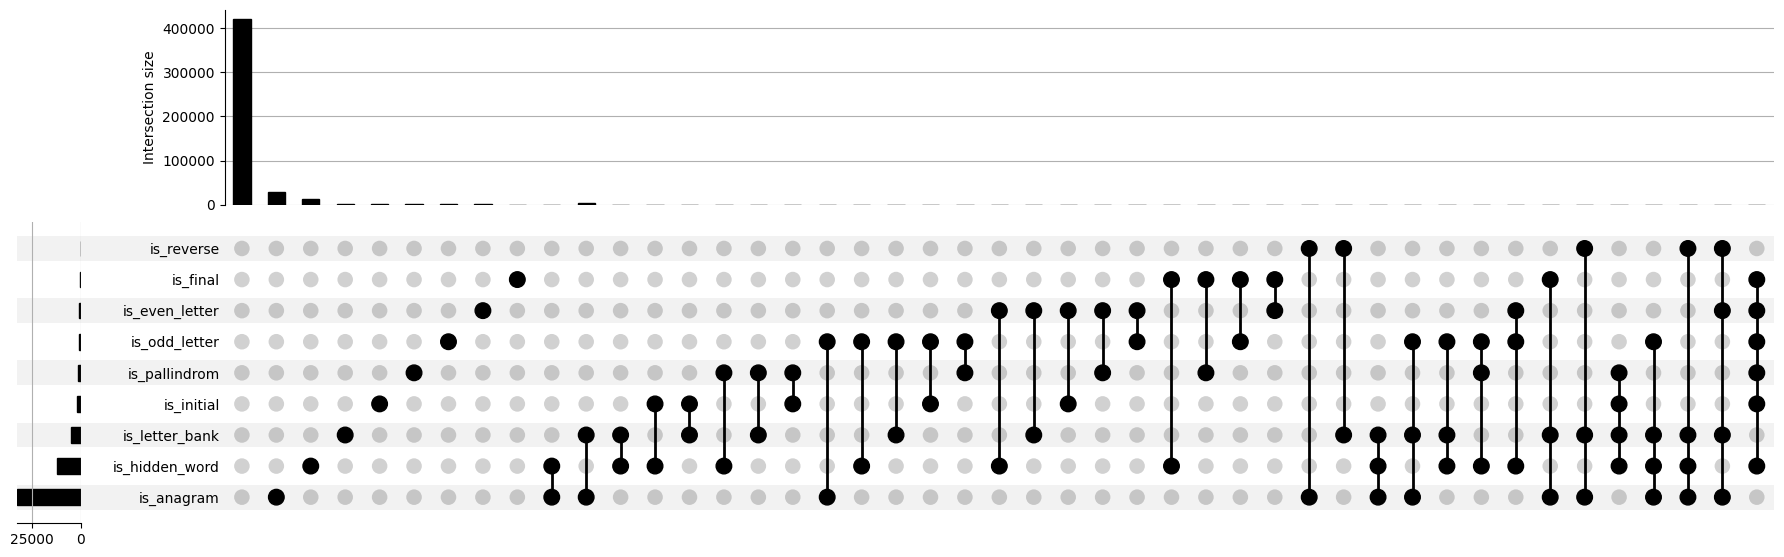

In [23]:
from upsetplot import UpSet
import pandas as pd

df = data['train'].to_pandas()
# todo: Combine letter selections

# Assuming 'df' is your DataFrame with flag columns
flags = df[['is_anagram', 'is_reverse', 'is_hidden_word', 'is_initial', 'is_final', 'is_even_letter', 'is_odd_letter', 'is_pallindrom', 'is_letter_bank', ]]

# Group by all flag columns and count occurrences
intersections = flags.groupby(flags.columns.tolist()).size()

# Create and plot the UpSet plot
UpSet(intersections).plot()